In [95]:
import math
import pandas as pd
import numpy as np

In [96]:
#load data from excel file using pip or conda install xlrd
#install pip 
#install conda
#install xlrd

df = pd.read_csv('heart_data_original.csv', index_col=0)
df.head()




,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
ID,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0


In [97]:
#descrive data
df.describe()



,age,trestbps,chol,thalch,oldpeak,ca,num
count,676.000000,643.000000,650.000000,643.000000,640.000000,223.000000,676.000000
mean,51.715976,131.068429,214.946154,141.838258,0.645938,0.399103,0.392012
std,9.276611,18.137884,99.125025,25.059654,0.900312,0.733619,0.488561
min,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000,0.000000
25%,45.000000,120.000000,195.000000,122.000000,0.000000,0.000000,0.000000
50%,53.000000,130.000000,228.500000,143.000000,0.000000,0.000000,0.000000
75%,58.000000,140.000000,269.000000,160.500000,1.200000,1.000000,1.000000
max,76.000000,200.000000,603.000000,202.000000,5.000000,3.000000,1.000000


In [98]:
#check for null values
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     33
chol         26
fbs          54
restecg       2
thalch       33
exang        33
oldpeak      36
slope       260
ca          453
thal        383
num           0
dtype: int64

In [99]:
#drop the columns slope, ca, thal
df.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
ID,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,0


In [100]:
#fill numerical columns trestbps, chol, thalch, oldpeak with mean
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
ID,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,0
2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,1
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,0
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,0
5,56,Male,Cleveland,atypical angina,120.000000,236.0,False,normal,178.000000,False,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
672,62,Male,VA Long Beach,asymptomatic,158.000000,170.0,False,st-t abnormality,138.000000,True,0.000000,1
673,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,1
674,62,Male,VA Long Beach,typical angina,131.068429,139.0,False,st-t abnormality,141.838258,NaN,0.645938,0


In [101]:
#number of null values
df.isnull().sum()


age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         54
restecg      2
thalch       0
exang       33
oldpeak      0
num          0
dtype: int64

In [102]:
#input mode for categorical columns fbs, restecg, exang, slope, ca, thal
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
#df['slope'].fillna(df['slope'].mode()[0], inplace=True)
#df['ca'].fillna(df['ca'].mode()[0], inplace=True)
#df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
ID,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,0
2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,1
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,0
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,0
5,56,Male,Cleveland,atypical angina,120.000000,236.0,False,normal,178.000000,False,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
672,62,Male,VA Long Beach,asymptomatic,158.000000,170.0,False,st-t abnormality,138.000000,True,0.000000,1
673,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,1
674,62,Male,VA Long Beach,typical angina,131.068429,139.0,False,st-t abnormality,141.838258,False,0.645938,0


In [103]:
#number of null values
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [104]:
#convert the categorical colums are sex,cp,fbs,restecg,exang,slope,ca,thal 
#use a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['exang'] = le.fit_transform(df['exang'])
#df['slope'] = le.fit_transform(df['slope'])
#df['ca'] = le.fit_transform(df['ca'])
#df['thal'] = le.fit_transform(df['thal'])
df





,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
ID,,,,,,,,,,,,
1,63,1,Cleveland,3,145.000000,233.0,1,0,150.000000,0,2.300000,0
2,67,1,Cleveland,0,120.000000,229.0,0,0,129.000000,1,2.600000,1
3,37,1,Cleveland,2,130.000000,250.0,0,1,187.000000,0,3.500000,0
4,41,0,Cleveland,1,130.000000,204.0,0,0,172.000000,0,1.400000,0
5,56,1,Cleveland,1,120.000000,236.0,0,1,178.000000,0,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
672,62,1,VA Long Beach,0,158.000000,170.0,0,2,138.000000,1,0.000000,1
673,54,0,VA Long Beach,0,127.000000,333.0,1,2,154.000000,0,0.000000,1
674,62,1,VA Long Beach,3,131.068429,139.0,0,2,141.838258,0,0.645938,0


In [105]:
#drop the dataset column
df.drop(['dataset'], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
ID,,,,,,,,,,,
1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,0
5,56,1,1,120.0,236.0,0,1,178.0,0,0.8,0


In [106]:
#scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,0.729167,1.0,1.000000,0.541667,0.386401,1.0,0.0,0.609023,0.0,0.644737,0.0
1,0.812500,1.0,0.000000,0.333333,0.379768,0.0,0.0,0.451128,1.0,0.684211,1.0
2,0.187500,1.0,0.666667,0.416667,0.414594,0.0,0.5,0.887218,0.0,0.802632,0.0
3,0.270833,0.0,0.333333,0.416667,0.338308,0.0,0.0,0.774436,0.0,0.526316,0.0
4,0.583333,1.0,0.333333,0.333333,0.391376,0.0,0.5,0.819549,0.0,0.447368,0.0


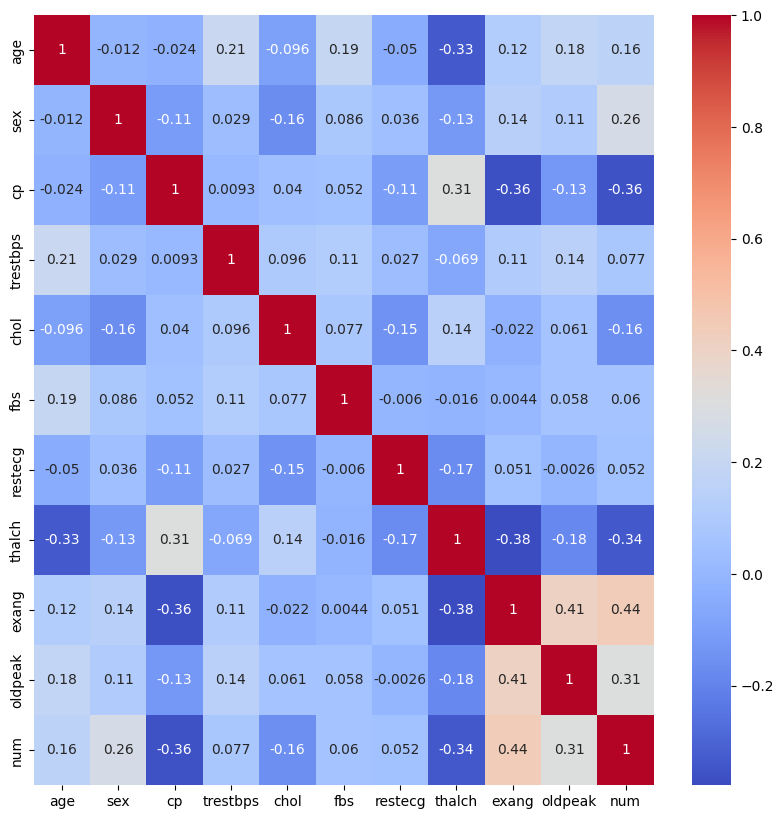

In [107]:
#correlation matrix between all the columns
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [108]:
#drop the columns age, sex, trestbps,chol,fbs and restecg
#df.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg'], axis=1, inplace=True)
#df

In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

# split data into training and testing to predict weight
X = df.drop(['num'], axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Transform the features into a polynomial feature set
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define and train your polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions using the trained polynomial regression model
y_pred = poly_model.predict(X_test_poly)

# Display MSE and R2 score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Display predicted weight vs actual weight
df_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_values


Mean squared error: 0.14
Coefficient of determination: 0.41


,Actual,Predicted
564,1.0,0.589436
31,0.0,0.084499
352,0.0,0.019866
188,0.0,0.265623
404,0.0,0.659717
...,...,...
627,1.0,0.794706
589,1.0,0.511940
455,1.0,0.790651
319,0.0,0.200935


In [110]:
#Display the linear regression intercept 
m = poly_model.intercept_
m

0.30870959005450055

In [111]:
#Display the linear regression coefficients

c= poly_model.coef_
c


array([ 0.        ,  0.08298621,  0.1626282 , -0.28309189, -0.00581215,
       -0.42095291,  0.06007529, -0.02715734, -0.28892613,  0.26846464,
        0.57284173])

In [112]:
df_values.to_csv('predicted_vs_actual_test.csv')

In [113]:
# split data into training and testing to predict weight
X = df.drop(['num'], axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

#define and train the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Make predictions using the trained logistic regression model
y_pred = logreg.predict(X_test)

#Display the MSE and R2 score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#Display predicted weight vs actual weight
df_pred_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred_actual

Mean squared error: 0.21
Coefficient of determination: 0.14


,Actual,Predicted
564,1.0,1.0
31,0.0,0.0
352,0.0,0.0
188,0.0,0.0
404,0.0,1.0
...,...,...
627,1.0,1.0
589,1.0,1.0
455,1.0,1.0
319,0.0,0.0


In [114]:
df.to_csv('heart_data_cleaned_V5.csv')

In [115]:
#Show all unique values in the dataframe
for col in df.columns:
    print(col, df[col].unique())
    

age [0.72916667 0.8125     0.1875     0.27083333 0.58333333 0.60416667
 0.52083333 0.33333333 0.5        0.41666667 0.54166667 0.4375
 0.75       0.625      0.45833333 0.79166667 0.3125     0.85416667
 0.64583333 0.29166667 0.6875     0.25       0.89583333 0.47916667
 0.77083333 0.66666667 0.375      0.70833333 0.35416667 0.22916667
 0.39583333 0.125      0.14583333 0.02083333 0.5625     0.875
 0.83333333 0.95833333 1.         0.20833333 0.         0.04166667
 0.0625     0.08333333 0.10416667 0.16666667 0.91666667 0.9375
 0.97916667]
sex [1. 0.]
cp [1.         0.         0.66666667 0.33333333]
trestbps [0.54166667 0.33333333 0.41666667 0.5        0.76666667 0.58333333
 0.25       0.45833333 0.66666667 0.20833333 0.36666667 0.375
 0.51666667 0.4        0.625      0.2        0.48333333 0.23333333
 0.45       0.35       0.29166667 0.31666667 0.16666667 0.11666667
 0.75       0.26666667 0.18333333 0.6        0.175      0.43333333
 0.38333333 0.78333333 0.56666667 0.81666667 0.65       0.93

In [116]:
#export the data to excel file
df.to_csv('heart_data_cleaned3.csv')


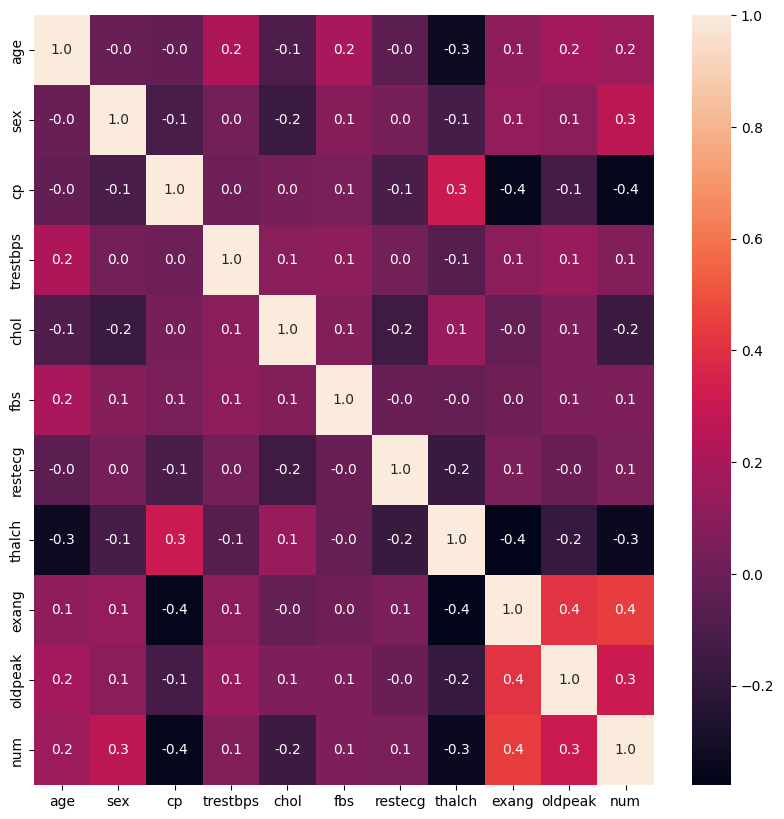

In [117]:
#correration matrix
#install seaborn
#install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()
